In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [121]:
df = pd.read_csv('car_insurance_claim.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [123]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [124]:
col_names = {
    'KIDSDRIV': 'num_young_drivers',
    'BIRTH': 'date_of_birth',
    'AGE': 'age',
    'HOMEKIDS': 'num_of_children',
    'YOJ': 'years_job_held_for',
    'INCOME': 'income',
    'PARENT1': 'single_parent',
    'HOME_VAL': 'value_of_home',
    'MSTATUS': 'married',
    'GENDER': 'gender',
    'EDUCATION': 'highest_education',
    'OCCUPATION': 'occupation',
    'TRAVTIME': 'commute_dist',
    'CAR_USE': 'type_of_use',
    'BLUEBOOK': 'vehicle_value',
    'TIF': 'policy_tenure',
    'CAR_TYPE': 'vehicle_type',
    'RED_CAR': 'red_vehicle',
    'OLDCLAIM': '5_year_total_claims_value',
    'CLM_FREQ': '5_year_num_of_claims',
    'REVOKED': 'licence_revoked',
    'MVR_PTS': 'license_points',
    'CLM_AMT': 'new_claim_value',
    'CAR_AGE': 'vehicle_age',
    'CLAIM_FLAG': 'is_claim',
    'URBANICITY': 'address_type'
}

df.rename(columns=col_names,inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10302 non-null  int64  
 1   num_young_drivers          10302 non-null  int64  
 2   date_of_birth              10302 non-null  object 
 3   age                        10295 non-null  float64
 4   num_of_children            10302 non-null  int64  
 5   years_job_held_for         9754 non-null   float64
 6   income                     9732 non-null   object 
 7   single_parent              10302 non-null  object 
 8   value_of_home              9727 non-null   object 
 9   married                    10302 non-null  object 
 10  gender                     10302 non-null  object 
 11  highest_education          10302 non-null  object 
 12  occupation                 9637 non-null   object 
 13  commute_dist               10302 non-null  int

In [126]:
pd.set_option('display.max_columns', None)
df.head()

,ID,num_young_drivers,date_of_birth,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [127]:
cols = ['income','value_of_home','vehicle_value','5_year_total_claims_value','new_claim_value']

In [128]:
for col in cols:
    df[col] = df[col].str.replace(r'[\$,]','',regex=True).astype('Int64')

### this loop to remove $ and , sign so we can converte these columns into Int64 ᡣ𐭩 •｡ꪆৎ ˚⋅

In [129]:
cols_z = ['married','gender','highest_education','occupation','vehicle_type','address_type']

In [130]:
for col in cols_z:
    df[col] = df[col].str.replace(r'[z_]','',regex=True)
#### remove prefix that contains z_ ᡣ𐭩 •｡ꪆৎ ˚⋅

In [131]:
df[cols_z] #### donneee ᡣ𐭩 •｡ꪆৎ ˚⋅

,married,gender,highest_education,occupation,vehicle_type,address_type
0,No,M,PhD,Professional,Minivan,Highly Urban/ Urban
1,No,M,High School,Blue Collar,Minivan,Highly Urban/ Urban
2,No,M,Bachelors,Manager,Van,Highly Urban/ Urban
3,Yes,F,High School,Clerical,SUV,Highly Urban/ Urban
4,Yes,M,<High School,Blue Collar,Minivan,Highly Urban/ Urban
...,...,...,...,...,...,...
10297,Yes,M,PhD,Manager,Minivan,Highly Urban/ Urban
10298,Yes,M,Masters,NaN,Panel Truck,Highly Urban/ Urban
10299,Yes,F,<High School,Blue Collar,SUV,Highly Urban/ Urban
10300,Yes,F,Bachelors,Home Maker,Minivan,Highly Urban/ Urban


In [132]:
df.drop(columns=['ID','date_of_birth'],inplace=True)
#### we have droped the useless columns such as ID || Date_of_birth because,
#### they won't help in our prediction ᡣ𐭩 •｡ꪆৎ ˚⋅


In [133]:
df

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type
0,0,60.0,0,11.0,67349,No,0,No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449,No,257252,No,M,High School,Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881,No,0,No,M,Bachelors,Manager,26,Private,21970,1,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039,No,124191,Yes,F,High School,Clerical,5,Private,4010,4,SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,<NA>,No,306251,Yes,M,<High School,Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669,No,386273,Yes,M,PhD,Manager,21,Private,13270,15,Minivan,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban
10298,0,46.0,0,9.0,107204,No,332591,Yes,M,Masters,NaN,36,Commercial,24490,6,Panel Truck,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10299,0,48.0,0,15.0,39837,No,170611,Yes,F,<High School,Blue Collar,12,Private,13820,7,SUV,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10300,0,50.0,0,7.0,43445,No,149248,Yes,F,Bachelors,Home Maker,36,Private,22550,6,Minivan,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban


In [134]:
df.query('new_claim_value > 0 and is_claim == 0')


#### we have to check that no one shouldn't claim has claimed any value ᡣ𐭩 •｡ꪆৎ ˚⋅

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type


In [135]:
df['is_claim'].unique()

array([0, 1])

<Axes: xlabel='new_claim_value', ylabel='Count'>

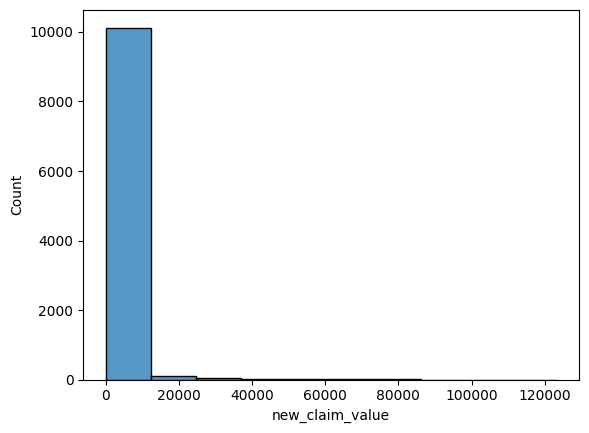

In [136]:
sns.histplot(df['new_claim_value'],bins=10)

In [137]:
bins = [0.0, 5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,np.inf] ### define the bins so we can divide the continuose values into categorical ones
labels = ["Very Low", "Low", "Medium", "High", "Very High", "Extreme", "Ultra", "Mega", "Super", "Hyper", "Max"] #### labels for them !!

df['claim_value_cat'] = pd.cut(df['new_claim_value'],bins = bins,labels=labels,include_lowest=True)

<Axes: ylabel='claim_value_cat'>

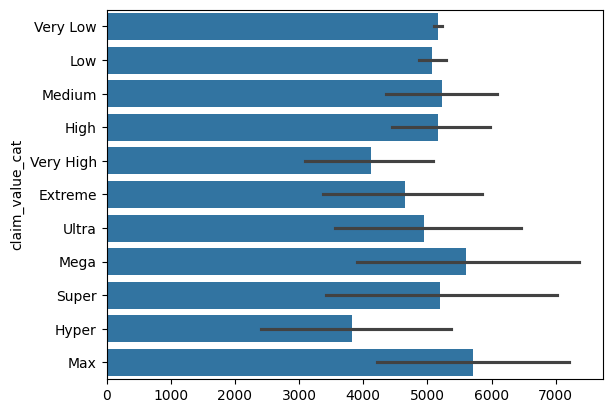

In [138]:
sns.barplot(df['claim_value_cat'])

In [139]:
df.columns

Index(['num_young_drivers', 'age', 'num_of_children', 'years_job_held_for',
       'income', 'single_parent', 'value_of_home', 'married', 'gender',
       'highest_education', 'occupation', 'commute_dist', 'type_of_use',
       'vehicle_value', 'policy_tenure', 'vehicle_type', 'red_vehicle',
       '5_year_total_claims_value', '5_year_num_of_claims', 'licence_revoked',
       'license_points', 'new_claim_value', 'vehicle_age', 'is_claim',
       'address_type', 'claim_value_cat'],
      dtype='object')

In [140]:
df['claim_value_cat']

0        Very Low
1        Very Low
2        Very Low
3        Very Low
4        Very Low
           ...   
10297    Very Low
10298    Very Low
10299    Very Low
10300    Very Low
10301    Very Low
Name: claim_value_cat, Length: 10302, dtype: category
Categories (11, object): ['Very Low' < 'Low' < 'Medium' < 'High' ... 'Mega' < 'Super' < 'Hyper' < 'Max']

In [141]:
X = df.drop(columns=['is_claim']).copy()
y = df['is_claim']

In [142]:
y.unique() ### just to make sure our target variable is 0 & 1 since we are doing Binary Classification ᡣ𐭩 •｡ꪆৎ ˚⋅

array([0, 1])

In [143]:
X.columns ### donee ᡣ𐭩 •｡ꪆৎ ˚⋅

Index(['num_young_drivers', 'age', 'num_of_children', 'years_job_held_for',
       'income', 'single_parent', 'value_of_home', 'married', 'gender',
       'highest_education', 'occupation', 'commute_dist', 'type_of_use',
       'vehicle_value', 'policy_tenure', 'vehicle_type', 'red_vehicle',
       '5_year_total_claims_value', '5_year_num_of_claims', 'licence_revoked',
       'license_points', 'new_claim_value', 'vehicle_age', 'address_type',
       'claim_value_cat'],
      dtype='object')

* Lets Split our data into Training and Testing data ᡣ𐭩 •｡ꪆৎ ˚⋅

In [144]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
train_data = y_train.sum()
test_data = y_test.sum()

print(f"the number of people who claimed in training data: {train_data}")
print(f"the number of people who claimed in testing data: {test_data}")

### we can find the ratio in percentage by dividing it by len(y) * 100 it will gives you the ratio 


the number of people who claimed in training data: 2191
the number of people who claimed in testing data: 555


<Axes: >

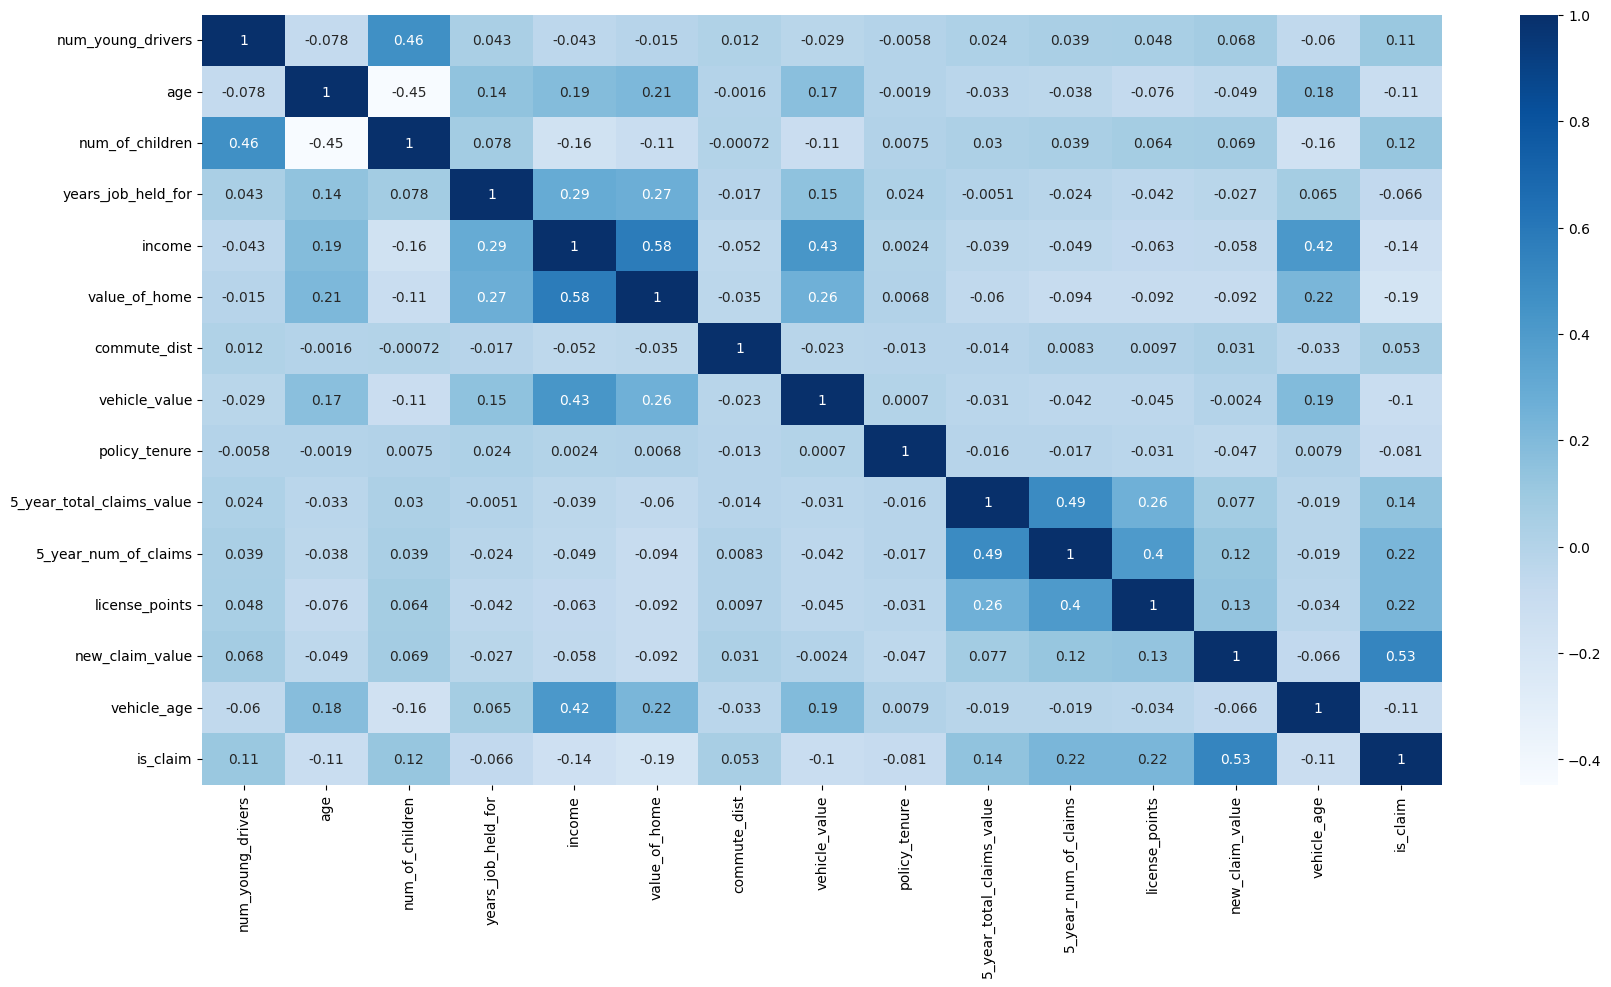

In [146]:
plt.figure(figsize=(20,10))

heat_map = df.corr(numeric_only=True)
sns.heatmap(data=heat_map,cmap='Blues',annot=True) #### just so can we see the linear coorelation between columsn and targer variable ᡣ𐭩 •｡ꪆৎ ˚⋅

2. Explority Data Analysis (EDA)

In [147]:
eda_test_data = X_train.copy()
eda_test_data['is_claim'] = y_train

In [148]:
eda_test_data

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,claim_value_cat,is_claim
9009,0,54.0,0,14.0,100816,No,281563,Yes,F,Masters,Lawyer,33,Private,21680,6,Minivan,no,0,0,No,1,0,20.0,Highly Urban/ Urban,Very Low,0
8916,0,53.0,0,5.0,20683,No,151996,No,F,Bachelors,Home Maker,5,Private,8870,7,SUV,no,1745,1,No,7,0,12.0,Highly Urban/ Urban,Very Low,0
8900,0,50.0,0,NaN,33854,No,139245,Yes,F,Masters,Lawyer,15,Private,17600,3,Sports Car,no,5217,1,No,0,0,21.0,Highly Urban/ Urban,Very Low,0
841,0,39.0,1,6.0,56014,No,234014,Yes,F,Bachelors,Professional,28,Private,7100,4,SUV,no,0,0,No,0,6098,NaN,Highly Urban/ Urban,Low,1
2124,0,66.0,0,15.0,74260,No,277449,Yes,F,Masters,Lawyer,31,Private,15530,6,SUV,no,0,0,No,0,0,11.0,Highly Urban/ Urban,Very Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,43.0,2,12.0,23996,No,150242,Yes,F,<High School,Home Maker,47,Private,7100,6,Sports Car,no,0,0,No,0,0,7.0,Highly Rural/ Rural,Very Low,0
5191,0,36.0,0,12.0,<NA>,No,<NA>,No,M,Bachelors,Professional,27,Private,12620,17,Minivan,no,0,0,No,0,0,15.0,Highly Urban/ Urban,Very Low,0
5390,0,35.0,1,9.0,77179,Yes,0,No,M,High School,Blue Collar,34,Commercial,12720,10,Minivan,no,0,0,No,0,4966,4.0,Highly Urban/ Urban,Very Low,1
860,0,38.0,0,12.0,<NA>,No,122423,Yes,M,<High School,Clerical,35,Commercial,32460,1,Panel Truck,yes,1414,2,No,4,0,1.0,Highly Urban/ Urban,Very Low,0


In [149]:
from sklearn.preprocessing import LabelEncoder
##### Let's do some Encoding while we have just binary encoding it's better to use Labelencoder than get_dummies  it will put them within 1 column ᡣ𐭩 •｡ꪆৎ ˚⋅

encode =LabelEncoder()

eda_test_data['single_parent'] = encode.fit_transform(eda_test_data['single_parent'])
eda_test_data['gender'] = encode.fit_transform(eda_test_data['gender'])
eda_test_data['married'] = encode.fit_transform(eda_test_data['married'])
eda_test_data['red_vehicle'] = encode.fit_transform(eda_test_data['red_vehicle'])
eda_test_data['licence_revoked'] = encode.fit_transform(eda_test_data['licence_revoked'])


In [150]:
eda_test_data.info() ### it works Yayyy ᡣ𐭩 •｡ꪆৎ ˚⋅

<class 'pandas.core.frame.DataFrame'>
Index: 8241 entries, 9009 to 7270
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_young_drivers          8241 non-null   int64   
 1   age                        8237 non-null   float64 
 2   num_of_children            8241 non-null   int64   
 3   years_job_held_for         7799 non-null   float64 
 4   income                     7789 non-null   Int64   
 5   single_parent              8241 non-null   int64   
 6   value_of_home              7799 non-null   Int64   
 7   married                    8241 non-null   int64   
 8   gender                     8241 non-null   int64   
 9   highest_education          8241 non-null   object  
 10  occupation                 7706 non-null   object  
 11  commute_dist               8241 non-null   int64   
 12  type_of_use                8241 non-null   object  
 13  vehicle_value              8241 non

<Axes: >

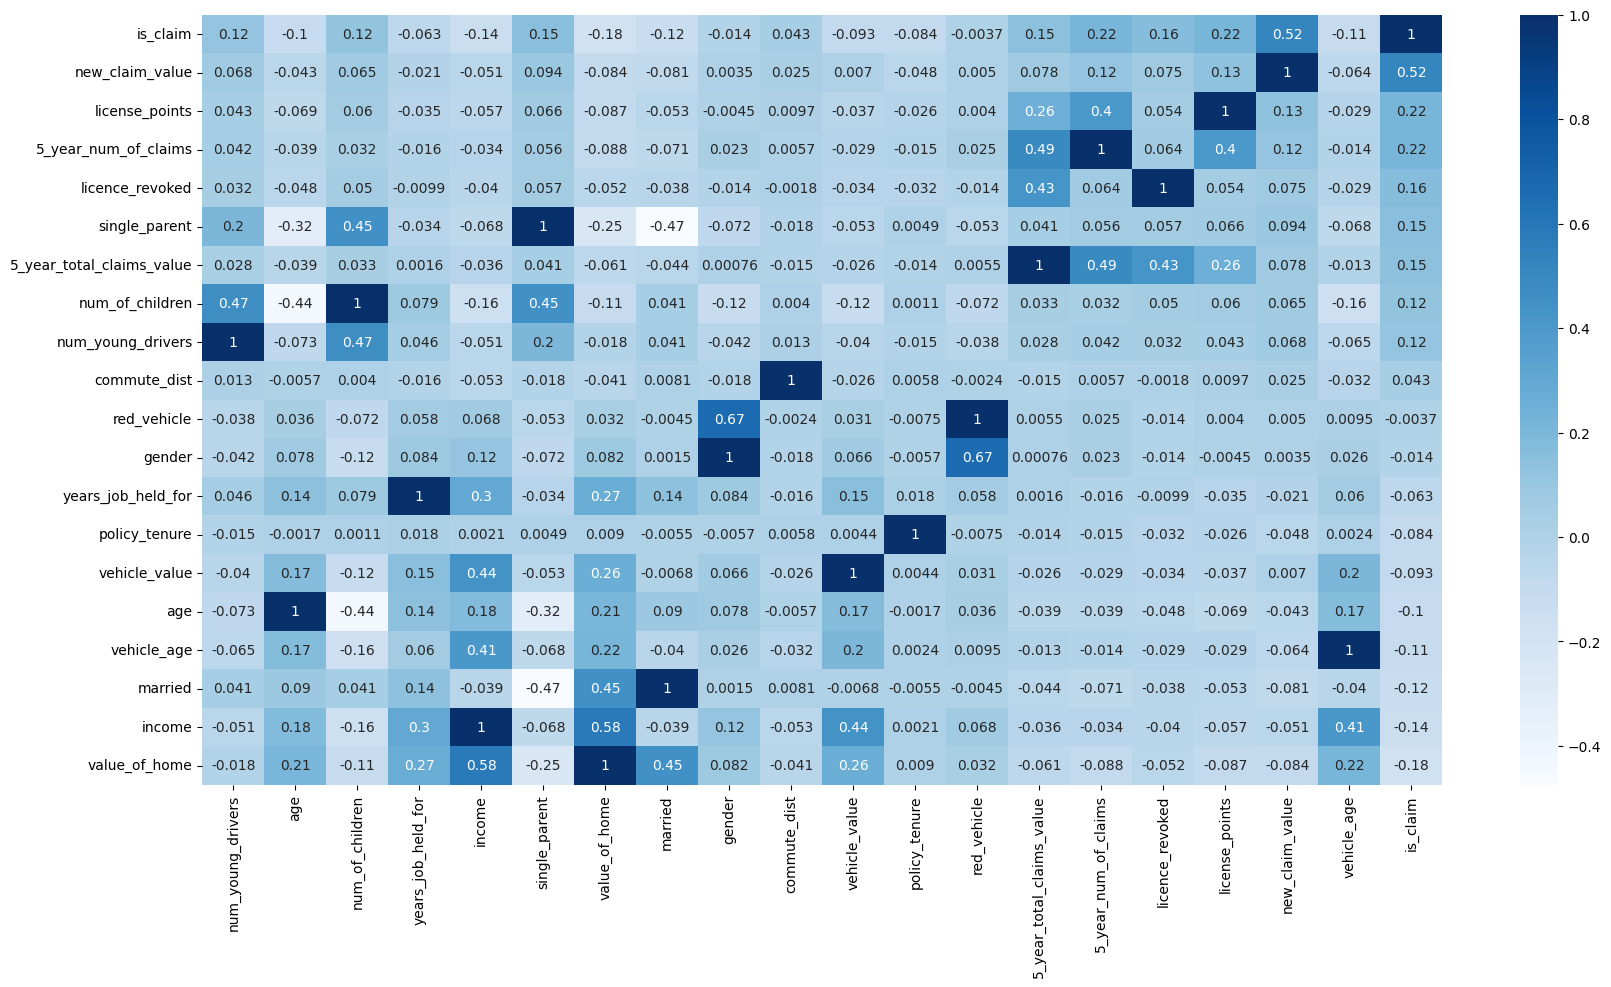

In [151]:
plt.figure(figsize=(20,10))
corr_eda = eda_test_data.corr(numeric_only=True).sort_values(by ='is_claim',ascending = False)
sns.heatmap(data=corr_eda,cmap='Blues',annot=True)

* Droping Red_Vehicle Feature

***** note we didn't handle those missing data since we are using XGboost but if you will use any other Algorithm you have to handle it XGboost provides a way to handle the missing data by picking the best branch for it

In [154]:
df['age'].median()

np.float64(45.0)